In [1]:
%matplotlib notebook
import pickle
import numpy as np
import pandas as pd
import sys
import plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

In [5]:
saves_dir = os.path.join("../saves", "vader_pos_neg_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../input.json").read())
preload_flag = True
plot_save_prefix = "vader_pos_neg_dist"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]
CB_color_cycle = [('#377eb8'), ('#ff7f00')]

'word_level'



Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_word_level_non_amz


<IPython.core.display.Javascript object>


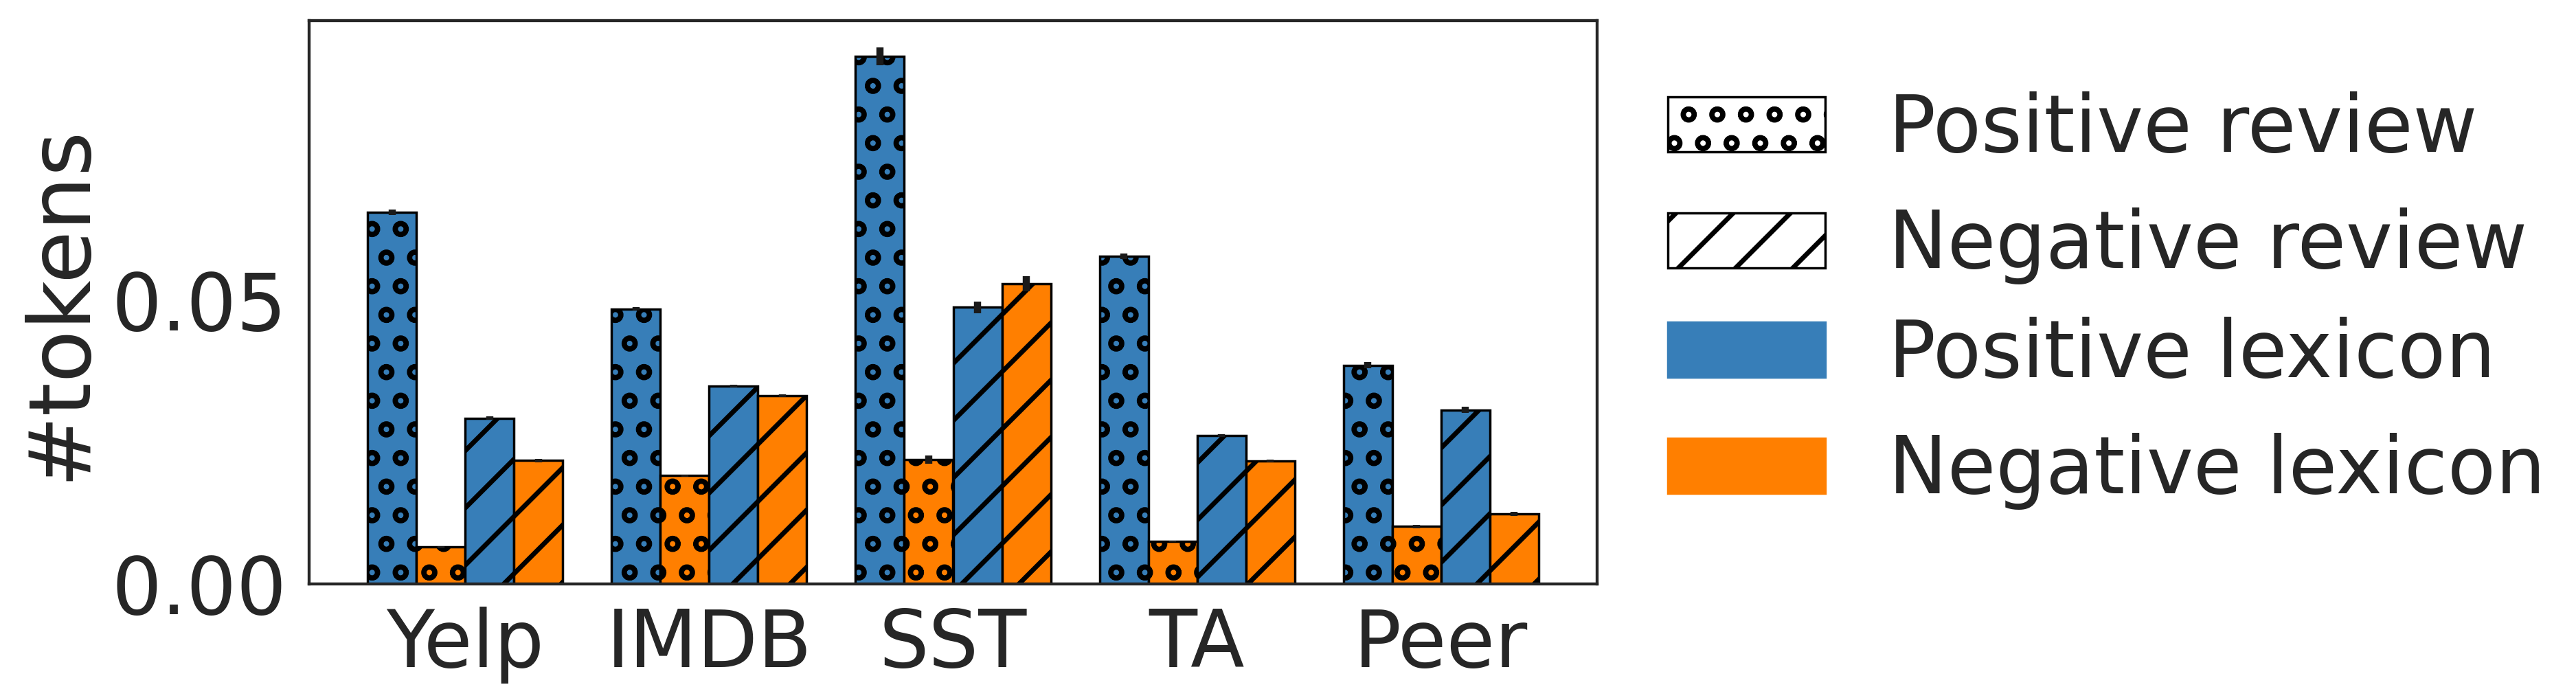

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.





Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_word_level_amz


<IPython.core.display.Javascript object>


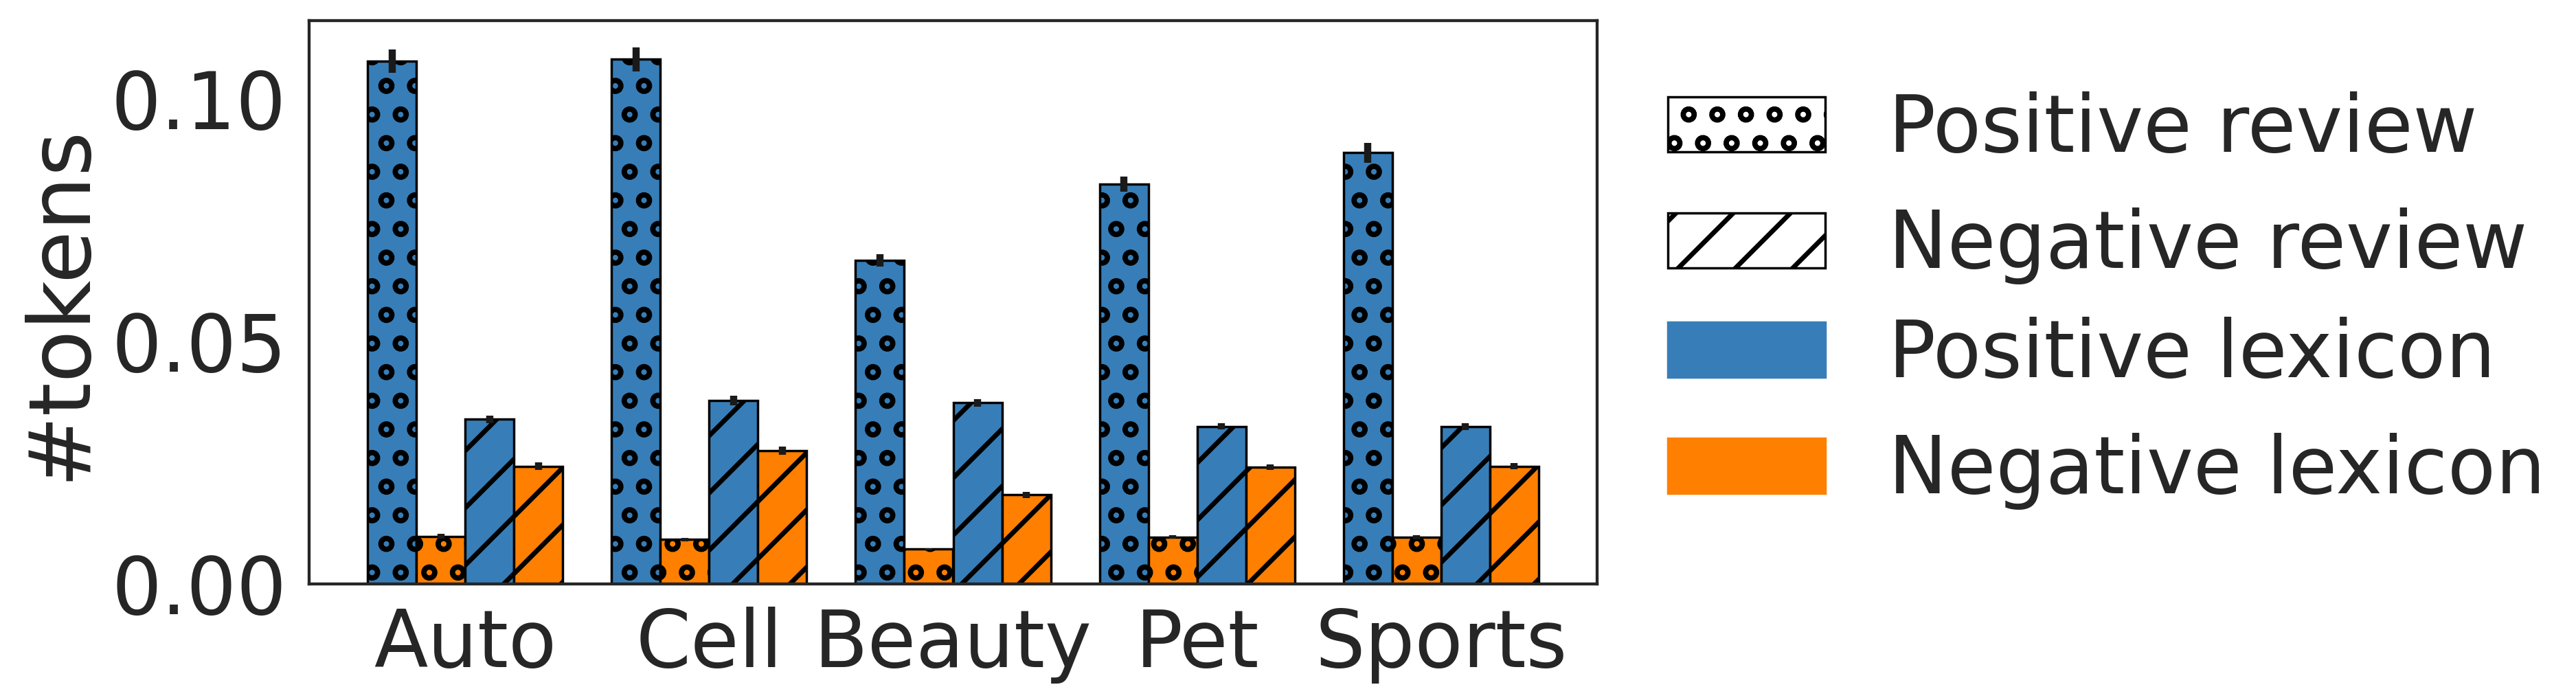

'sent_level'



Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


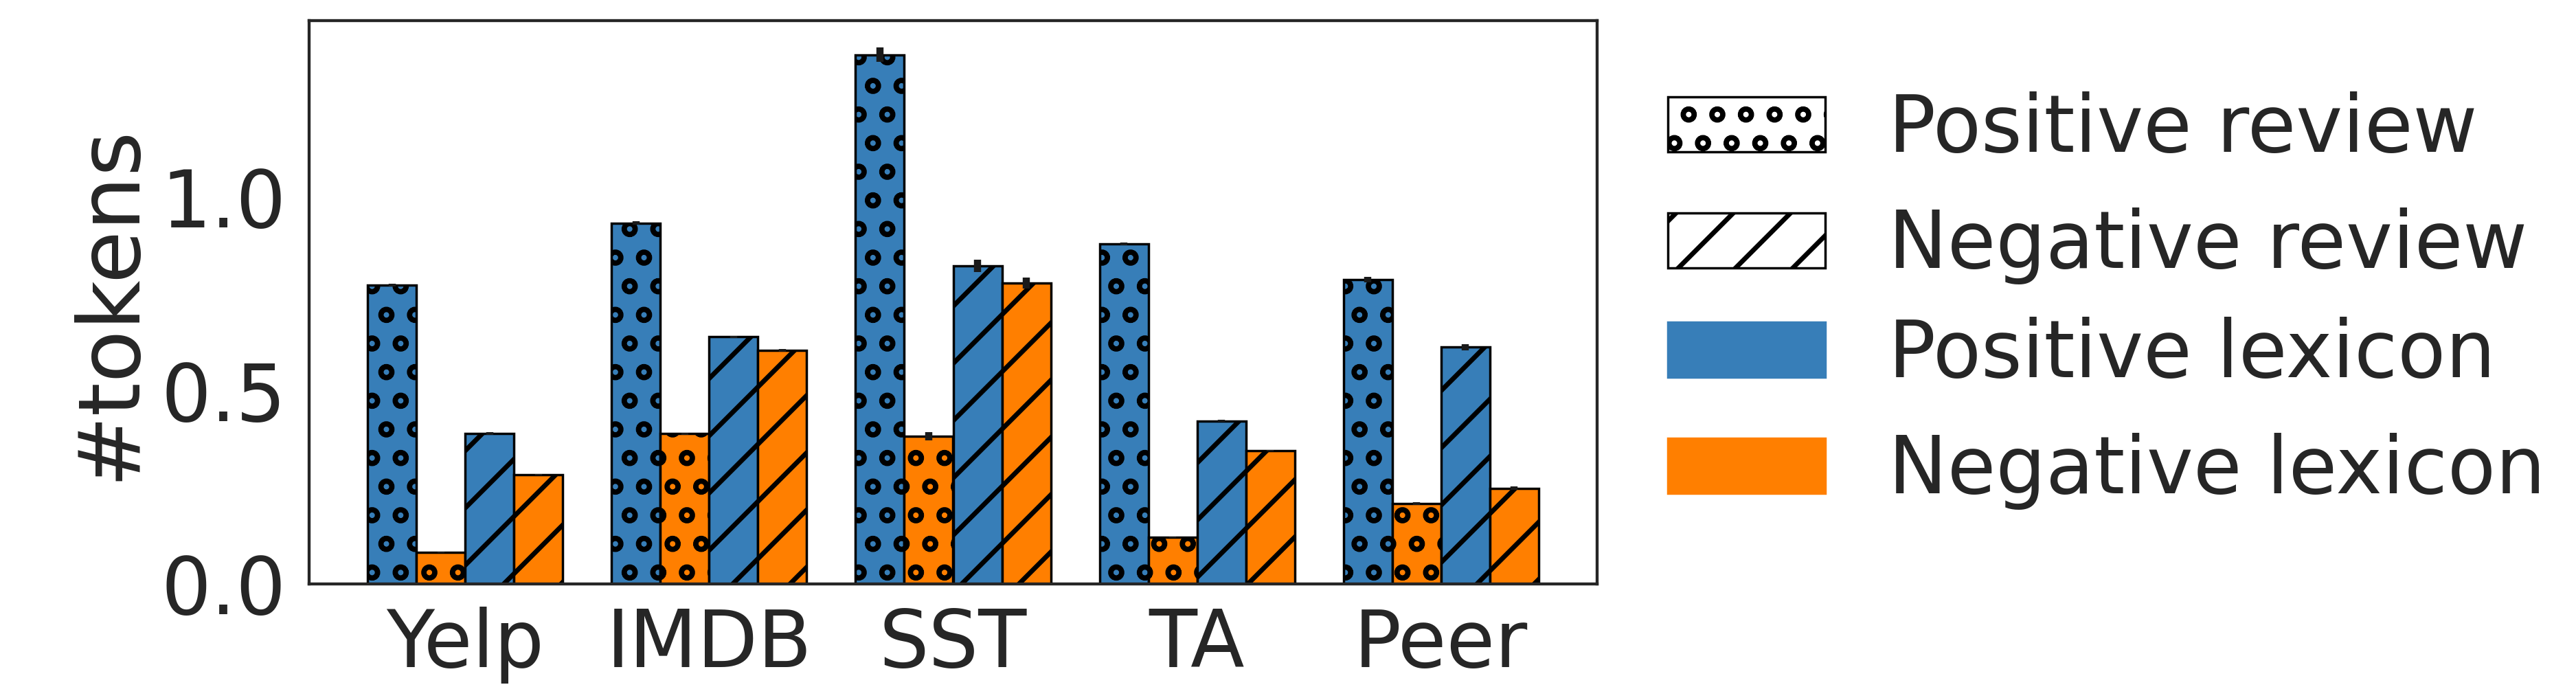




Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_sent_level_amz


<IPython.core.display.Javascript object>


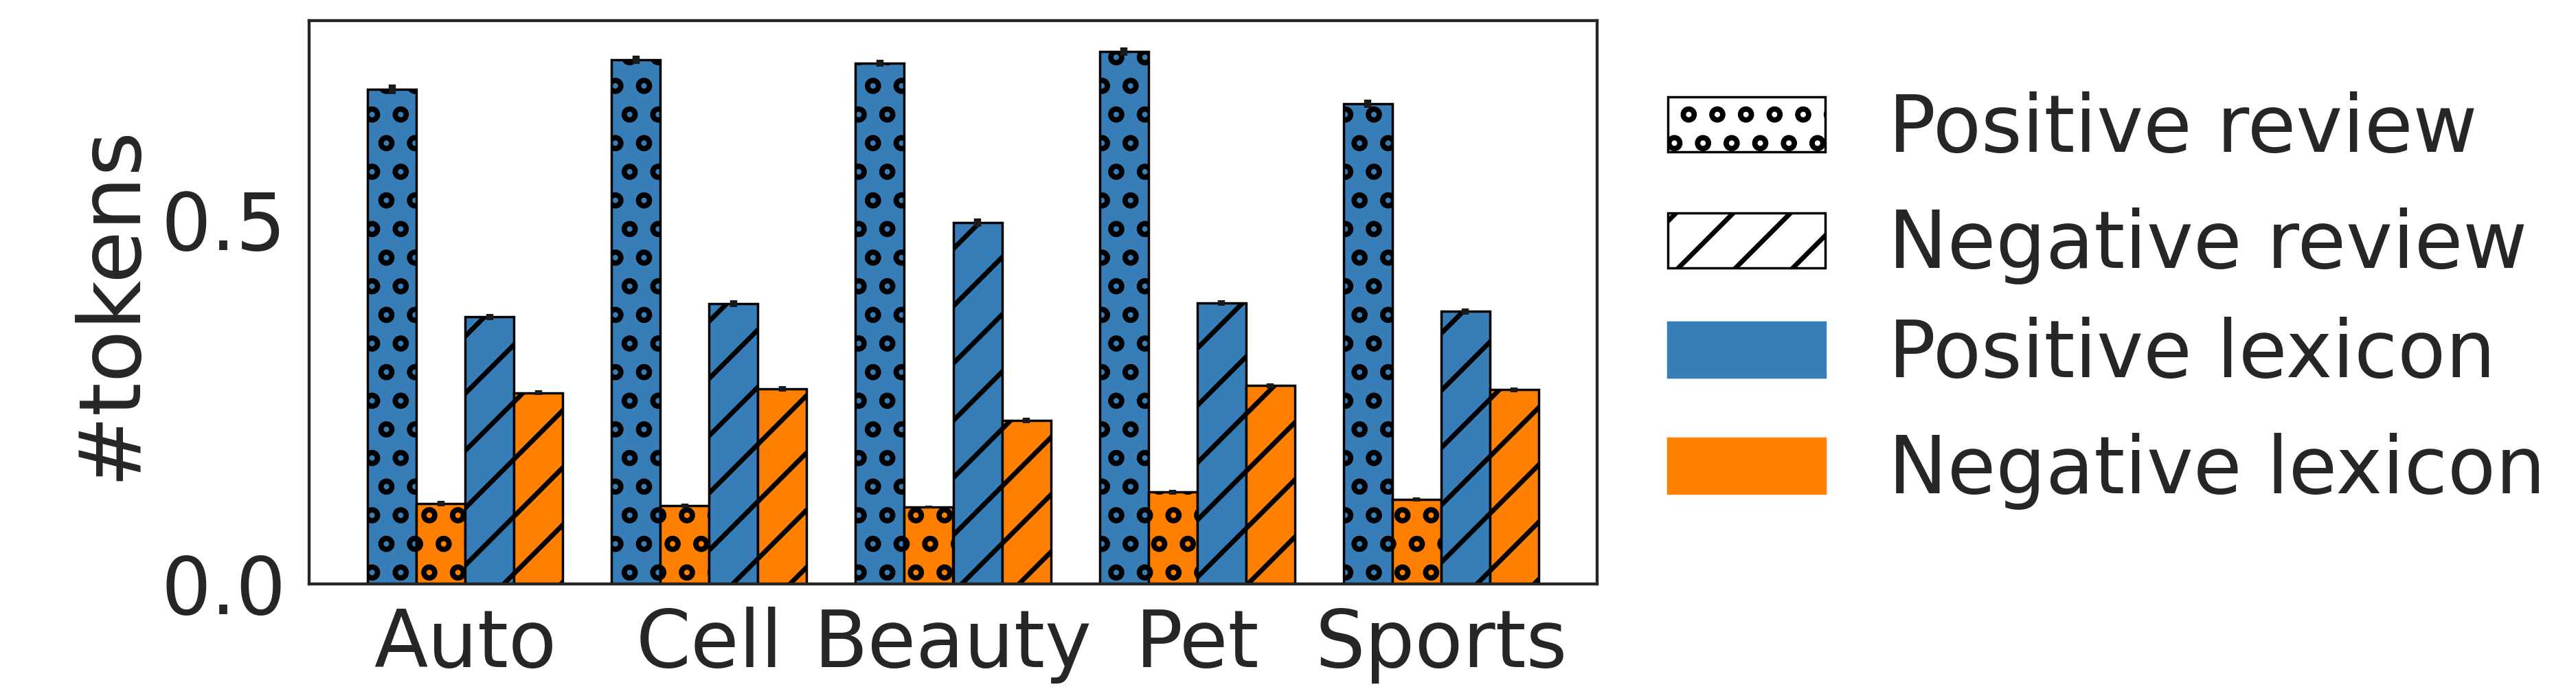

'review_level'



Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_review_level_non_amz


<IPython.core.display.Javascript object>


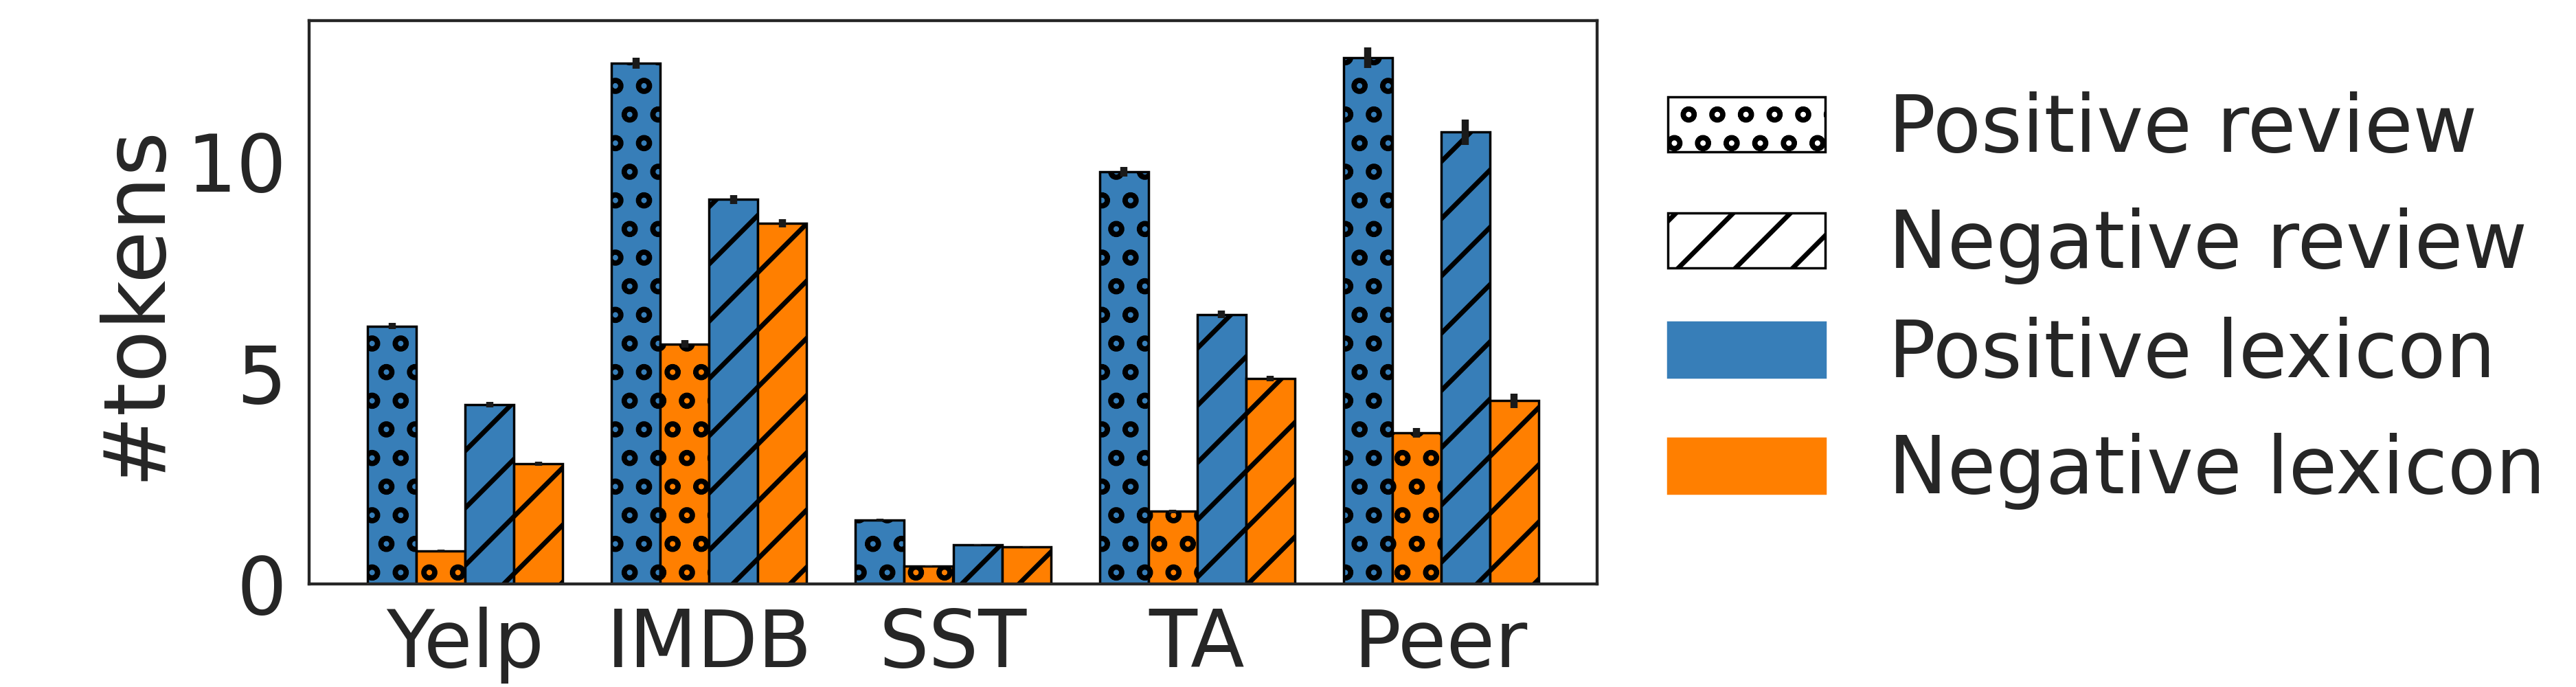




Saving the plot in  ../saves/vader_pos_neg_dist/vader_pos_neg_dist_review_level_amz


<IPython.core.display.Javascript object>


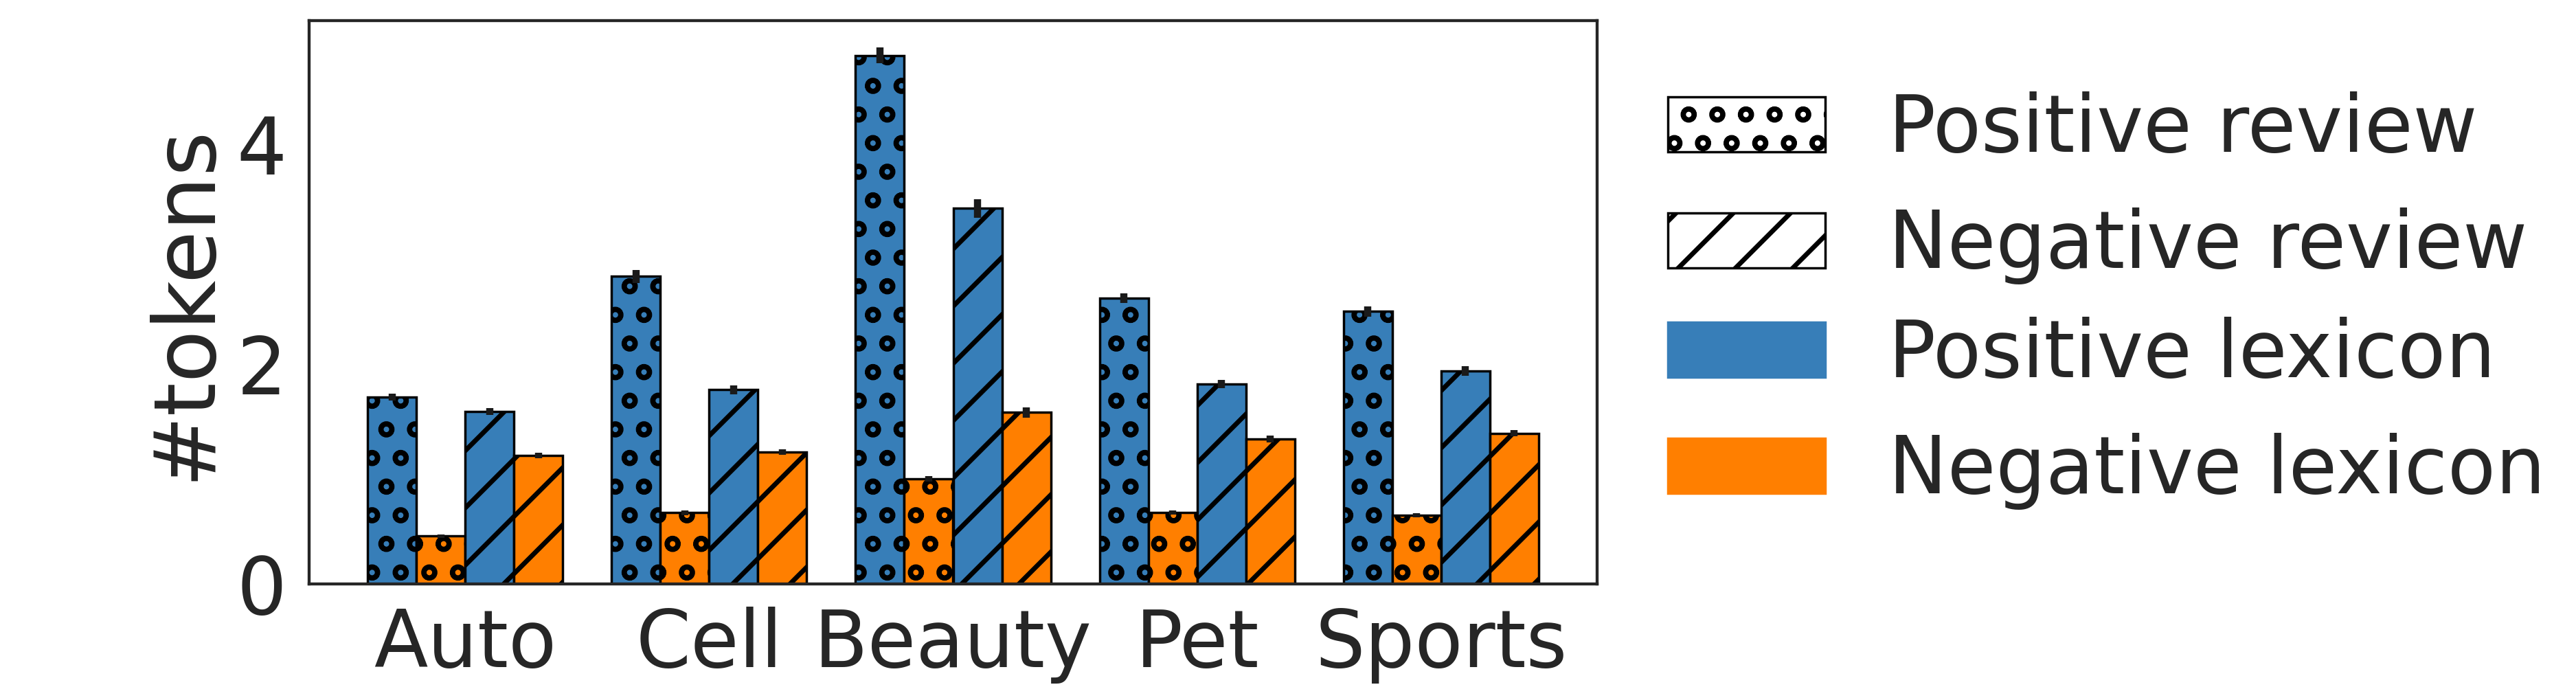

In [6]:
reload(plot_util)
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))

for analysis in analysis_types: 
    myprint(analysis)
    amazon_data, non_amazon_data = plot_util.filter_plot_data(plot_data[analysis])
    plot_util.draw_grouped_bargraph_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), position=(0.12, 0.15, 0.5, 0.82),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#tokens",
        negation=False, colors=CB_color_cycle*2)
    plot_util.draw_grouped_bargraph_four_subbars(amazon_data, "name", "value", 
            "review category", "text sentiment",
            os.path.join(saves_dir, plot_save_prefix+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), position=(0.12, 0.15, 0.5, 0.82),
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            amazon_data_flag=True,
            y_axis_name="#tokens",
            negation=False, colors=CB_color_cycle*2)